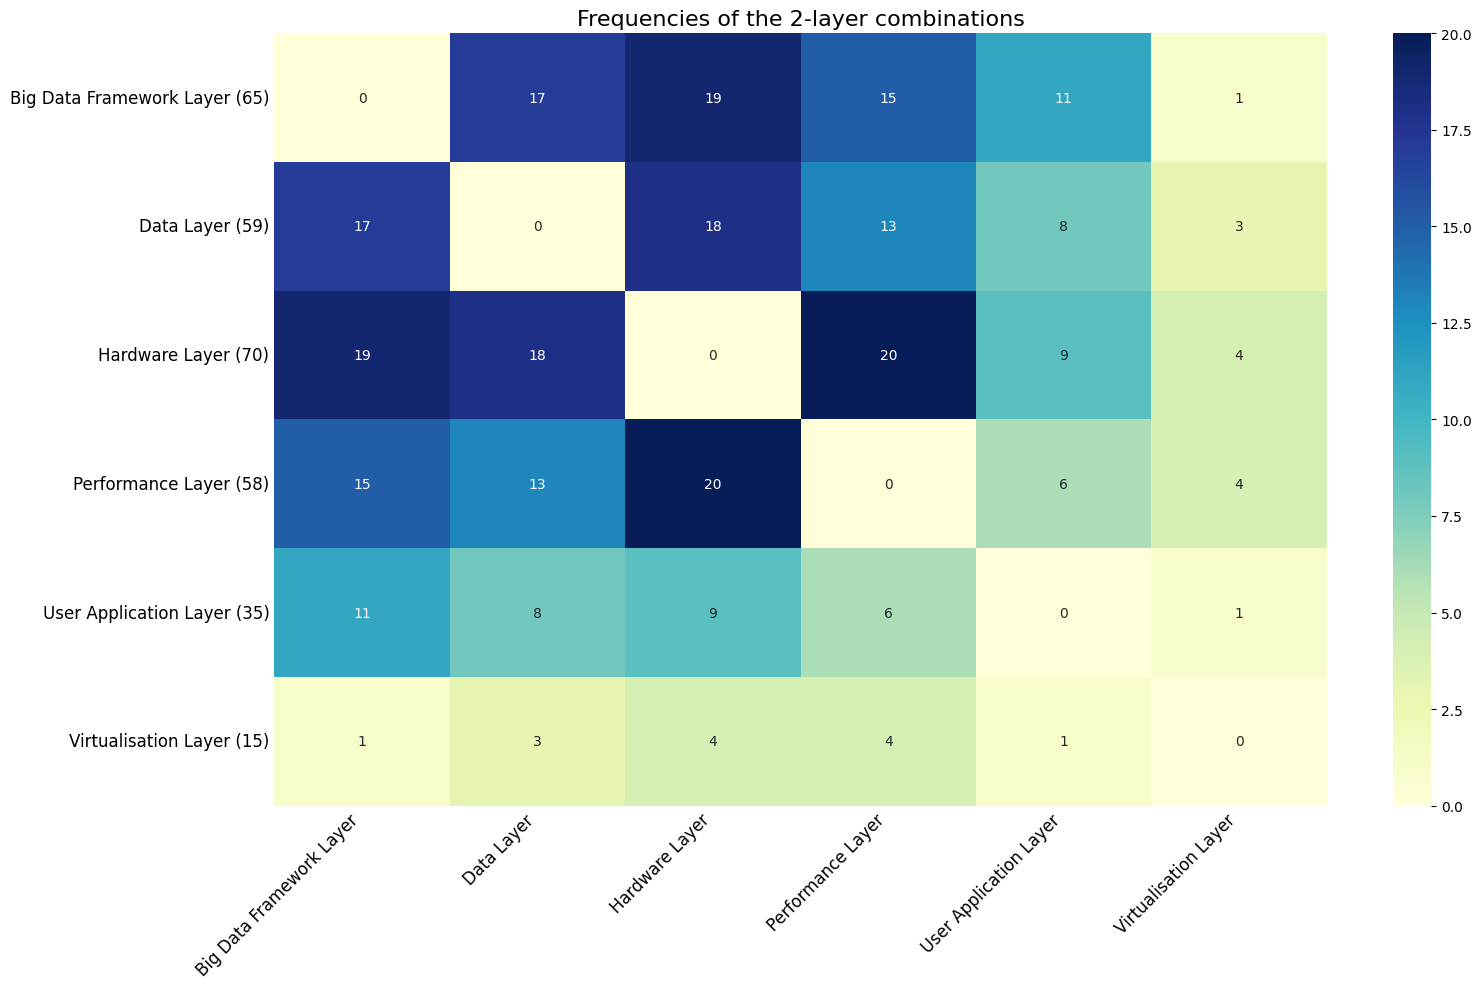

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data for the graph
daten = [
    (('Hardware Layer', 'Performance Layer'), 20),
    (('Hardware Layer', 'Big Data Framework Layer'), 19),
    (('Hardware Layer', 'Data Layer'), 18),
    (('Big Data Framework Layer', 'Data Layer'), 17),
    (('Big Data Framework Layer', 'Performance Layer'), 15),
    (('Performance Layer', 'Data Layer'), 13),
    (('Big Data Framework Layer', 'User Application Layer'), 11),
    (('Hardware Layer', 'User Application Layer'), 9),
    (('Data Layer', 'User Application Layer'), 8),
    (('Performance Layer', 'User Application Layer'), 6),
    (('Hardware Layer', 'Virtualisation Layer'), 4),
    (('Virtualisation Layer', 'Performance Layer'), 4),
    (('Virtualisation Layer', 'Data Layer'), 3),
    (('Virtualisation Layer', 'Big Data Framework Layer'), 2),
    (('Virtualisation Layer', 'User Application Layer'), 1),
    (('Big Data Framework Layer', 'Virtualisation Layer'), 1),
]

# Eindeutige Schichten identifizieren
schichten = set()
for tupel, _ in daten:
    schichten.update(tupel)
schichten = sorted(list(schichten))

# Mapping von Schichten zu Indizes für die Matrix
schicht_index = {schicht: i for i, schicht in enumerate(schichten)}

# Leere Matrix initialisieren
matrix = np.zeros((len(schichten), len(schichten)))

# Matrix mit Häufigkeiten füllen
for (schicht1, schicht2), haeufigkeit in daten:
    i, j = schicht_index[schicht1], schicht_index[schicht2]
    matrix[i, j] = haeufigkeit
    matrix[j, i] = haeufigkeit  # Matrix symmetrisch machen

# Calculate overall frequency of each layer
layer_frequencies = {layer: 0 for layer in schichten}
for (layer1, layer2), frequency in daten:
    layer_frequencies[layer1] += frequency
    layer_frequencies[layer2] += frequency

# Add overall frequencies to layer names
schichten_with_freq = [f"{layer} ({freq})" for layer, freq in layer_frequencies.items()]

# Heatmap erstellen
plt.figure(figsize=(14, 10))
ax = sns.heatmap(matrix, annot=True, fmt=".0f", cmap="YlGnBu", xticklabels=schichten, yticklabels=schichten_with_freq)
# plt.title("Frequencies of the 2-layer combinations", fontsize=16)

# Enhance the plot aesthetics
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.gca().tick_params(axis='both', which='both', length=0)
plt.gca().spines[:].set_visible(False)

# Adjust layout to fit the additional text
plt.tight_layout(rect=[0, 0, 1.15, 1])
plt.show()
